In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os, sys
import math
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)
import dezero
from dezero import Variable, optimizers
from dezero.models import MLP
import dezero.functions as F
from dezero.datasets import get_spiral

## Step29

In [ ]:
def rosenbrock(x0, x1):
    y = 100*(x1 - x0 ** 2)**2 + (x0 - 1) ** 2
    return y

In [ ]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

In [ ]:
x = np.linspace(-2, 2 ,400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

contour = plt.contour(X, Y, Z, levels=100, cmap='viridis', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.title('Contour Plot of the Rosenbrock Function')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar(contour)

lr = 0.001
x0, x1 = (Variable(np.array(0.0)), Variable(np.array(2.0)))
xx0 = [x0.data.item()]
xx1 = [x1.data.item()]

for i in range(10000):
    y = rosenbrock(x0, x1)
    x0.clear_grad()
    x1.clear_grad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
    xx0.append(x0.data.item())
    xx1.append(x1.data.item())

plt.plot(xx0,xx1, "-or", alpha=0.5)



In [ ]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

def newton(x0, x1, iters):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)  
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= x0.grad / gx2(x0.data)
        res.append([x0.data.item(), y.data.item()])
    
    return res

def sdg(x0, x1, iters, lr=0.001):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= lr*x0.grad
        res.append([x0.data.item(), y.data.item()])
    
    return res
        
x = np.linspace(-2, 2 ,400)
y = f(x)

flg, ax = plt.subplots(1, 2, figsize=(9,3), sharey=True)
ax[0].plot(x, y)
ax[1].plot(x, y)

x0 = Variable(np.array(2.0))
x1 = Variable(np.array(8.0))

p0 = newton(x0, x1, 1000)
p0 = np.array(p0)
ax[0].plot(p0[:,0], p0[:,1], "-or")
ax[0].set_title('Newton')

p1 = sdg(x0, x1, 1000)
p1 = np.array(p1)
ax[1].plot(p1[:,0], p1[:,1], 'ob')
ax[1].set_title('sgd')

plt.show()


## Step33

In [ ]:
x = Variable(np.linspace(-7,7,200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data.flatten()]
trial = 3
for i in range(trial):
    logs.append(x.grad.data.flatten())
    gx = x.grad
    x.clear_grad()
    gx.backward(create_graph=True)

labels = ['y=sin(x)', "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
    
plt.legend(loc='lower right')
plt.show()

In [ ]:
origin = 100
rate = 0.01
term = 365
sum = []
sum.append(origin)

for i in range(term):
    origin = origin * (1 + rate)
    sum.append(origin)

plt.bar(np.arange(term + 1),sum)
print(sum[-1])
plt.show()


$y = Wx + b$ \
$W = np.random.rand(100,1)$\
$b = 5$

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1)
b = 5
y = 2 * x + 5 # 
plt.scatter(x, y)
plt.show()

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1)
W = np.random.rand(100, 1)
b = 5
y = 2 * x + 5 + W # 
plt.scatter(x, y)
plt.show()

In [ ]:
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

w = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

In [2]:
def predict(x):
    y = F.matmul(x, w) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [ ]:


lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    w.clear_grad()
    b.clear_grad()
    loss.backward()
    
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data
    print(w, b, loss)

In [ ]:
plt.scatter(x.data, y.data)
plt.plot(x.data, (x * w + b).data, color='r')
plt.show()

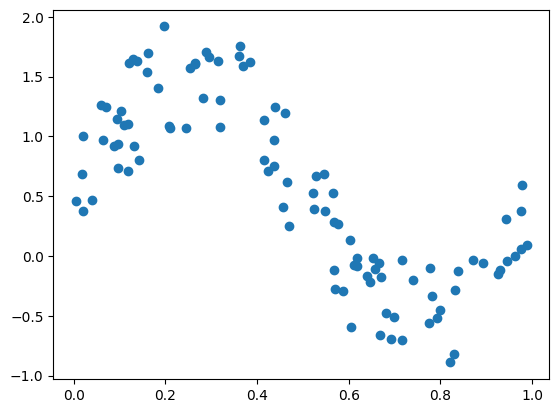

In [3]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)
plt.scatter(x, y)
plt.show()

In [5]:
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    #very boiler plate
    W1.clear_grad()
    W2.clear_grad()
    b1.clear_grad()
    b2.clear_grad()
    
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    
    if i % 1000 == 0:
        print(loss)
    

variable(0.8897859368058644)
variable(0.2506006800491759)
variable(0.2458216504031558)
variable(0.234211803663419)
variable(0.20520930151851857)
variable(0.1505899698670061)
variable(0.08735391913596187)
variable(0.0779689420642627)
variable(0.07739235601941584)
variable(0.0771209655854802)


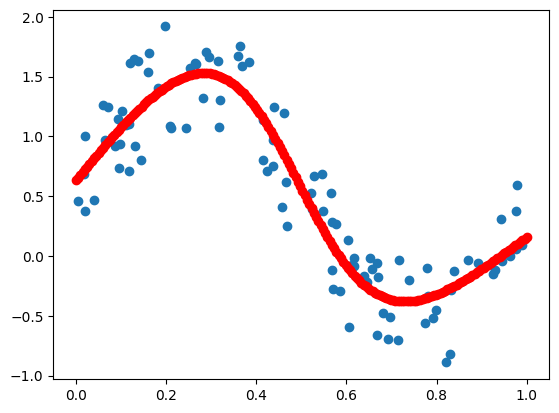

In [15]:
plt.scatter(x, y)
plt.scatter(np.linspace(0, 1, 200), predict(np.linspace(0, 1, 200).reshape(200,1)).data, color='r')

# Mean Squred Errorの勾配計算で勘違いしてたところ　\
微分の過程で、分母の $N$ がなくなるかどうかについて説明します。

### 微分の詳細

式 $L = \frac{1}{N} \sum (x_0 - x_1)^2$ を考えます。この式は、$N$ 個の項 $(x_0 - x_1)^2$ の平均を表しています。

1. **和の展開**:
   式は $L = \frac{1}{N} \sum_{i=1}^{N} (x_{0,i} - x_{1,i})^2$ と書くことができます。ここで、$x_{0,i}$と $x_{1,i}$ はそれぞれの項に対応する変数です。

2. **微分の適用**:
   各項 $(x_{0,i} - x_{1,i})^2$ に対して、$x_{1,i}$ で微分を行います。微分結果は $\frac{d}{dx_{1,i}} (x_{0,i} - x_{1,i})^2 = -2(x_{0,i} - x_{1,i})$ です。

   $i$行目の$x_0$である$x_{0,i}$に対する微分なんだから他の行はすべて消えるので$\sum$ももちろん消えた結果以下の式になる
   $$
   \frac{dL}{dx_{1,i}} = \frac{1}{N} \sum_{i=1}^{N} -2(x_{0,i} - x_{1,i}) = -\frac{2}{N} (x_{0,i} - x_{1,i})
   $$



epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

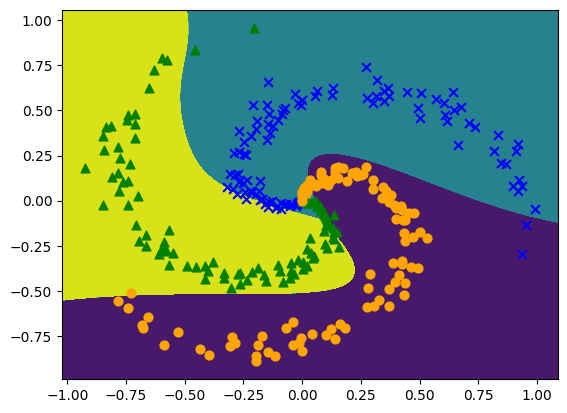

In [3]:
#Hyperparameters
import dezero.datasets


max_epoch = 100
batch_size = 30
hidden_size = 10
lr = 1

train_set = dezero.datasets.Spiral(train=True)
x, t = train_set.data, train_set.label
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    #shuffle
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]
        
        y = model(batch_x)
        loss = F.softmax_cross_entropy_simple(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_t)
    
    ave_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, ave_loss))
    
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)

predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z) #Z means height


N,CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40, marker=markers[c], c=colors[c])



In [2]:
import dezero.datasets
from dezero import transforms

train_set = dezero.datasets.Spiral(train=True)
print(train_set[0])
print(len(train_set))

f = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0), transforms.Astype(np.float64)])
train_set = dezero.datasets.Spiral(train=True, transform=f)
print(train_set[0])

f = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0), transforms.Astype(np.float64)])
print(len(f.transforms))


(array([-0.13981389, -0.00721657], dtype=float32), np.int64(1))
300


(array([-0.06990694, -0.00360829], dtype=float32), np.int64(1))
2


In [7]:
class MyIterator:
    def __init__(self, max_cnt):
        self.max_cnt = max_cnt
        self.cnt = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.cnt == self.max_cnt:
            raise StopIteration()
        
        self.cnt += 1
        return self.cnt

obj = MyIterator(5)
for x in obj:
    print(x)

1
2
3
4
5


In [2]:
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1
train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=True)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape)
        break
    
    for x, t in test_loader:
        print(x.shape, t.shape)
        break

    



(10, 2) (10,)
(10, 2) (10,)


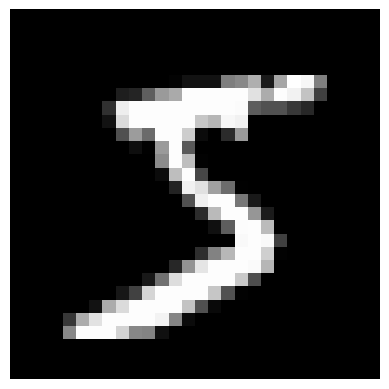

label: 5


In [4]:
train_set = dezero.datasets.MNIST(train=True, transform=None)
x, t = train_set[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)